### Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import time
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

## Lectura Bases de Datos

In [3]:
# Cargar las bases de datos
alertas = pd.read_csv("Data/Alertas.csv", sep = ";", encoding = 'utf8')
chart = pd.read_csv("Data/chart.csv", sep = ";", encoding = 'utf8')
errores_de_conexion = pd.read_csv("Data/Errores de conexion.csv", sep = ";")
errores = pd.read_csv("Data/Errores.csv", sep = ";")
otros_errores = pd.read_csv("Data/Otros errores.csv", sep = ";", encoding = 'latin1')
sesiones = pd.read_csv("Data/Sesiones.csv", sep = ";")
potencia_maxima = pd.read_csv("Data/potencia-mxima-alcanzada.csv", sep = ";")

transacciones = pd.read_excel("Data/Transacciones.xlsx", sheet_name="Statistics Users")

# Análisis de cada BDD y cada variable 

## BDD Alertas
66 filas 11 columnas o variable

In [4]:
alertas.head()

,ID,Toma,RFID,Descripción,Código Error,Tiempo KO (min),Información,Solución,Autogestión,Revisado,Fecha
0,85449042,1,9D45BEFB,15 - control pilot shortcircuit - Charger Stat...,15 - control pilot shortcircuit - OtherError,NaN,Hay un cortocircuito en el piloto de control,Desconecte el conector y vuelva a conectarlo. ...,NaN,NaN,"29-04-2025, 11:56"
1,84954172,2,62AAF420,16 - control pilot no diode - Charger Status: ...,16 - control pilot no diode - OtherError,NaN,Piloto de control de EV no tiene el diodo,Code 16,NaN,NaN,"24-04-2025, 17:39"
2,83378957,2,D45E7EAF,35 - DC leakage error - Charger Status: Faulted,35 - DC leakage error - OtherError,NaN,Hay una fuga de corriente contínua,Este problema desaparecerá cuando la sesión te...,NaN,NaN,"07-04-2025, 08:58"
3,81638873,1 2,4210747D ADB2C99C,11 - open door - Charger Status: Faulted,11 - open door - OtherError,NaN,La puerta está abierta,Cierre la puerta,NaN,NaN,"13-03-2025, 13:45"
4,81637519,1 2,4210747D 9E4D5697,11 - open door - Charger Status: Faulted,11 - open door - OtherError,NaN,La puerta está abierta,Cierre la puerta,NaN,NaN,"13-03-2025, 13:14"


In [5]:
alertas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               66 non-null     int64  
 1   Toma             66 non-null     object 
 2   RFID             66 non-null     object 
 3   Descripción      66 non-null     object 
 4   Código Error     66 non-null     object 
 5   Tiempo KO (min)  0 non-null      float64
 6   Información      66 non-null     object 
 7   Solución         66 non-null     object 
 8   Autogestión      0 non-null      float64
 9   Revisado         0 non-null      float64
 10  Fecha            66 non-null     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 5.8+ KB


In [6]:
alertas.describe()

,ID,Tiempo KO (min),Autogestión,Revisado
count,6.600000e+01,0.0,0.0,0.0
mean,6.826314e+07,NaN,NaN,NaN
std,9.562756e+06,NaN,NaN,NaN
min,5.543213e+07,NaN,NaN,NaN
25%,5.942903e+07,NaN,NaN,NaN
50%,6.764698e+07,NaN,NaN,NaN
75%,7.730658e+07,NaN,NaN,NaN
max,8.544904e+07,NaN,NaN,NaN


In [14]:
var = alertas['Fecha']
print(f"Número de elementos únicos: {var.nunique()}")
var.unique()

Número de elementos únicos: 66


array(['29-04-2025, 11:56', '24-04-2025, 17:39', '07-04-2025, 08:58',
       '13-03-2025, 13:45', '13-03-2025, 13:14', '13-03-2025, 13:01',
       '13-03-2025, 12:17', '11-03-2025, 14:44', '07-03-2025, 14:15',
       '01-03-2025, 08:42', '25-02-2025, 14:02', '12-02-2025, 13:57',
       '06-02-2025, 10:14', '06-02-2025, 10:12', '05-02-2025, 17:36',
       '05-02-2025, 11:09', '04-02-2025, 09:16', '04-02-2025, 09:15',
       '03-02-2025, 12:20', '30-01-2025, 08:54', '16-01-2025, 10:33',
       '15-01-2025, 12:17', '07-01-2025, 07:01', '03-01-2025, 10:36',
       '03-01-2025, 08:57', '03-01-2025, 08:56', '19-12-2024, 07:27',
       '16-12-2024, 15:01', '16-12-2024, 14:53', '16-12-2024, 07:59',
       '05-12-2024, 07:12', '18-11-2024, 10:42', '15-11-2024, 12:14',
       '14-11-2024, 15:19', '25-10-2024, 17:37', '23-10-2024, 15:47',
       '22-10-2024, 10:17', '18-10-2024, 13:44', '11-10-2024, 10:09',
       '08-10-2024, 09:46', '26-09-2024, 14:39', '20-09-2024, 11:35',
       '05-09-2024, 

## BDD Errores de Conexión

In [18]:
errores_de_conexion.head()

,ID,RFID,Descripción,Código Error,Tiempo KO (min),Información,Solución,Autogestión,Revisado,Fecha
0,81501265,4210747D,Charger without communication,Connection Error,0,El cargador no inició la conexión por websocket,Vuelva a comprobarlo en 15 minutos,NaN,NaN,"12-03-2025, 01:21"
1,79991383,B46415CD,Charger without communication,Connection Error,0,El cargador no inició la conexión por websocket,Vuelva a comprobarlo en 15 minutos,NaN,NaN,"23-02-2025, 11:02"
2,77305423,11D843BE,Charger without communication,Connection Error,0,El cargador no inició la conexión por websocket,Vuelva a comprobarlo en 15 minutos,NaN,NaN,"04-02-2025, 09:02"
3,77304116,11D843BE,Charger without communication,Connection Error,0,El cargador no inició la conexión por websocket,Vuelva a comprobarlo en 15 minutos,NaN,NaN,"04-02-2025, 08:51"
4,77302757,9D45BEFB,Charger without communication,Connection Error,0,El cargador no inició la conexión por websocket,Vuelva a comprobarlo en 15 minutos,NaN,NaN,"04-02-2025, 08:37"


In [19]:
errores_de_conexion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               382 non-null    int64  
 1   RFID             348 non-null    object 
 2   Descripción      382 non-null    object 
 3   Código Error     382 non-null    object 
 4   Tiempo KO (min)  382 non-null    int64  
 5   Información      382 non-null    object 
 6   Solución         382 non-null    object 
 7   Autogestión      0 non-null      float64
 8   Revisado         0 non-null      float64
 9   Fecha            382 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.0+ KB


In [32]:
var = errores_de_conexion['Fecha']
print(f"Número de elementos únicos: {var.nunique()}")
var.unique()


Número de elementos únicos: 382


array(['12-03-2025, 01:21', '23-02-2025, 11:02', '04-02-2025, 09:02',
       '04-02-2025, 08:51', '04-02-2025, 08:37', '03-02-2025, 05:50',
       '03-02-2025, 05:37', '03-02-2025, 05:21', '03-02-2025, 05:07',
       '03-02-2025, 04:50', '03-02-2025, 04:35', '03-02-2025, 04:19',
       '03-02-2025, 04:07', '03-02-2025, 03:49', '03-02-2025, 03:36',
       '03-02-2025, 03:20', '03-02-2025, 03:00', '03-02-2025, 02:51',
       '03-02-2025, 02:43', '03-02-2025, 02:37', '03-02-2025, 02:20',
       '03-02-2025, 02:12', '03-02-2025, 02:01', '03-02-2025, 01:51',
       '03-02-2025, 01:32', '03-02-2025, 01:21', '03-02-2025, 01:06',
       '03-02-2025, 00:48', '03-02-2025, 00:34', '03-02-2025, 00:20',
       '03-02-2025, 00:05', '02-02-2025, 23:49', '02-02-2025, 23:35',
       '02-02-2025, 23:21', '02-02-2025, 23:05', '02-02-2025, 22:48',
       '02-02-2025, 22:32', '02-02-2025, 22:17', '02-02-2025, 22:01',
       '02-02-2025, 21:48', '02-02-2025, 21:35', '02-02-2025, 21:17',
       '02-02-2025, 

## BDD Errores

In [33]:
errores.head()

,ID,Toma,RFID,Descripción,Código Error,Tiempo KO (min),Información,Solución,Autogestión,Revisado,Fecha
0,83532141,NaN,NaN,Charger not send heartbeats. IP => 166.210.64....,Heartbeat Error,NaN,El cargador no ha enviado Heartbeat,Vuelva a comprobarlo en 15 minutos,NaN,NaN,"09-04-2025, 00:24"
1,83522813,NaN,NaN,Charger not send heartbeats. IP => 166.210.64....,Heartbeat Error,NaN,El cargador no ha enviado Heartbeat,Vuelva a comprobarlo en 15 minutos,NaN,NaN,"08-04-2025, 23:15"
2,83043413,1,7B0734A0,25 - DC leakage sensor error - Charger Status:...,25 - DC leakage sensor error - OtherError,NaN,El sensor de fuga de DC está funcionando mal,Llama a la asistencia técnica,NaN,NaN,"03-04-2025, 13:04"
3,82937420,2,1BF4C9EC,25 - DC leakage sensor error - Charger Status:...,25 - DC leakage sensor error - OtherError,NaN,El sensor de fuga de DC está funcionando mal,Llama a la asistencia técnica,NaN,NaN,"02-04-2025, 10:00"
4,81994899,1,D45E7EAF,25 - DC leakage sensor error - Charger Status:...,25 - DC leakage sensor error - OtherError,NaN,El sensor de fuga de DC está funcionando mal,Llama a la asistencia técnica,NaN,NaN,"19-03-2025, 11:16"


In [37]:
errores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               36 non-null     int64  
 1   Toma             23 non-null     object 
 2   RFID             28 non-null     object 
 3   Descripción      36 non-null     object 
 4   Código Error     36 non-null     object 
 5   Tiempo KO (min)  9 non-null      float64
 6   Información      36 non-null     object 
 7   Solución         36 non-null     object 
 8   Autogestión      0 non-null      float64
 9   Revisado         0 non-null      float64
 10  Fecha            36 non-null     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 3.2+ KB


In [46]:
var = errores['Fecha']

print(f"Número de elementos únicos: {var.nunique()}")
var.unique()

Número de elementos únicos: 36


array(['09-04-2025, 00:24', '08-04-2025, 23:15', '03-04-2025, 13:04',
       '02-04-2025, 10:00', '19-03-2025, 11:16', '13-03-2025, 13:01',
       '22-02-2025, 07:02', '04-02-2025, 09:56', '04-02-2025, 09:02',
       '04-02-2025, 07:53', '03-02-2025, 05:52', '31-01-2025, 17:35',
       '31-01-2025, 15:57', '28-01-2025, 11:25', '27-01-2025, 15:43',
       '27-01-2025, 15:20', '27-01-2025, 08:53', '15-01-2025, 12:17',
       '15-01-2025, 08:26', '16-12-2024, 07:39', '11-12-2024, 18:32',
       '11-12-2024, 15:46', '11-12-2024, 14:32', '05-12-2024, 06:52',
       '04-12-2024, 17:01', '03-10-2024, 18:53', '03-10-2024, 18:39',
       '27-09-2024, 14:38', '27-09-2024, 10:00', '05-09-2024, 13:57',
       '30-08-2024, 12:18', '05-08-2024, 14:20', '25-07-2024, 10:55',
       '17-07-2024, 12:33', '08-07-2024, 15:19', '03-07-2024, 18:19'],
      dtype=object)

# Número de conexiones por hora

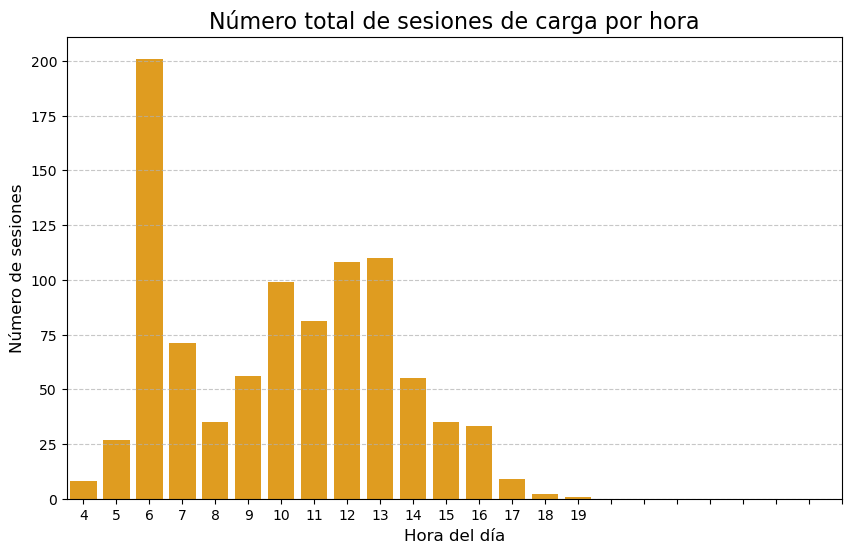

In [470]:
# 1. Extraer la hora de inicio de cada sesión (columna 'Inicio')
sesiones['Hora'] = pd.to_datetime(sesiones['Inicio']).dt.hour  # Extrae solo la hora (0-23)

# 2. Contar sesiones por hora
sesiones_por_hora = sesiones['Hora'].value_counts().sort_index()

# 3. Gráfico de barras (promedio de sesiones por hora)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=sesiones_por_hora.index,
    y=sesiones_por_hora.values,
    color='orange',
)

# 4. Personalizar el gráfico
plt.title('Número total de sesiones de carga por hora', fontsize=16)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Número de sesiones', fontsize=12)
plt.xticks(range(0, 24))  # Eje X de 0 a 23 horas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Mostrar el gráfico
plt.show()

# Modelo de predicción de demanda promedio de energía por hora

In [252]:
sesiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         931 non-null    int64  
 1   Minuto a minuto            931 non-null    int64  
 2   Toma                       931 non-null    int64  
 3   USER ID                    931 non-null    int64  
 4   Tarjeta                    926 non-null    object 
 5   Inicio                     931 non-null    object 
 6   Final                      931 non-null    object 
 7   Duración(mins)             931 non-null    int64  
 8   Tiempo seleccionado(mins)  395 non-null    float64
 9   Energía(kWh)               931 non-null    float64
 10  Energía seleccionada(kWh)  447 non-null    float64
 11  Modo                       931 non-null    object 
 12  costo                      0 non-null      float64
 13  Total(€)                   931 non-null    float64

In [253]:
# Eliminar columnas vacías
sesiones = sesiones.drop(columns=['costo'])

In [254]:
# Transformar las fechas de inicio y final a datetime, obtener las horas
sesiones['Inicio'] = pd.to_datetime(sesiones['Inicio'], format='%d/%m/%Y %H:%M')
sesiones['Final'] = pd.to_datetime(sesiones['Final'], format='%d/%m/%Y %H:%M')
sesiones['Hora media'] = (sesiones['Inicio'] + (sesiones['Final'] - sesiones['Inicio']) / 2).dt.time
sesiones['Inicio_hora'] = sesiones['Inicio'].dt.time
sesiones['Final_hora'] = sesiones['Final'].dt.time

# Obtener la hora como decimal
sesiones['Inicio_hora_num'] = sesiones['Inicio_hora'].apply(lambda t: t.hour + t.minute/60 + t.second/3600)

In [255]:
sesiones.head()

,ID,Minuto a minuto,Toma,USER ID,Tarjeta,Inicio,Final,Duración(mins),Tiempo seleccionado(mins),Energía(kWh),Energía seleccionada(kWh),Modo,Total(€),Token de pago,Ref Ext 1,Ref Ext 2,Hora media,Inicio_hora,Final_hora,Inicio_hora_num
0,4971580,4971580,2,1131724,1EB318F9,2025-04-30 16:54:00,2025-04-30 17:10:00,16,NaN,0.00,NaN,CARD,0.0,1000097552,NaN,NaN,17:02:00,16:54:00,17:10:00,16.900000
1,4970680,4970680,1,1131724,1EB318F9,2025-04-30 12:39:00,2025-04-30 16:40:00,241,NaN,6.73,10.0,APP,8754.2,---,---,---,14:39:30,12:39:00,16:40:00,12.650000
2,4970627,4970627,2,1149591,07C09540,2025-04-30 12:31:00,2025-04-30 16:31:00,240,NaN,24.44,40.0,APP,31770.7,---,---,---,14:31:00,12:31:00,16:31:00,12.516667
3,4969805,4969805,1,1131634,D45E7EAF,2025-04-30 10:18:00,2025-04-30 11:42:00,84,NaN,6.94,20.0,APP,9015.5,---,---,---,11:00:00,10:18:00,11:42:00,10.300000
4,4969233,4969233,2,1265951,73ECE76B,2025-04-30 08:27:00,2025-04-30 11:27:00,180,180.0,9.36,NaN,APP,12164.1,---,---,---,09:57:00,08:27:00,11:27:00,8.450000


### Matriz de correlación

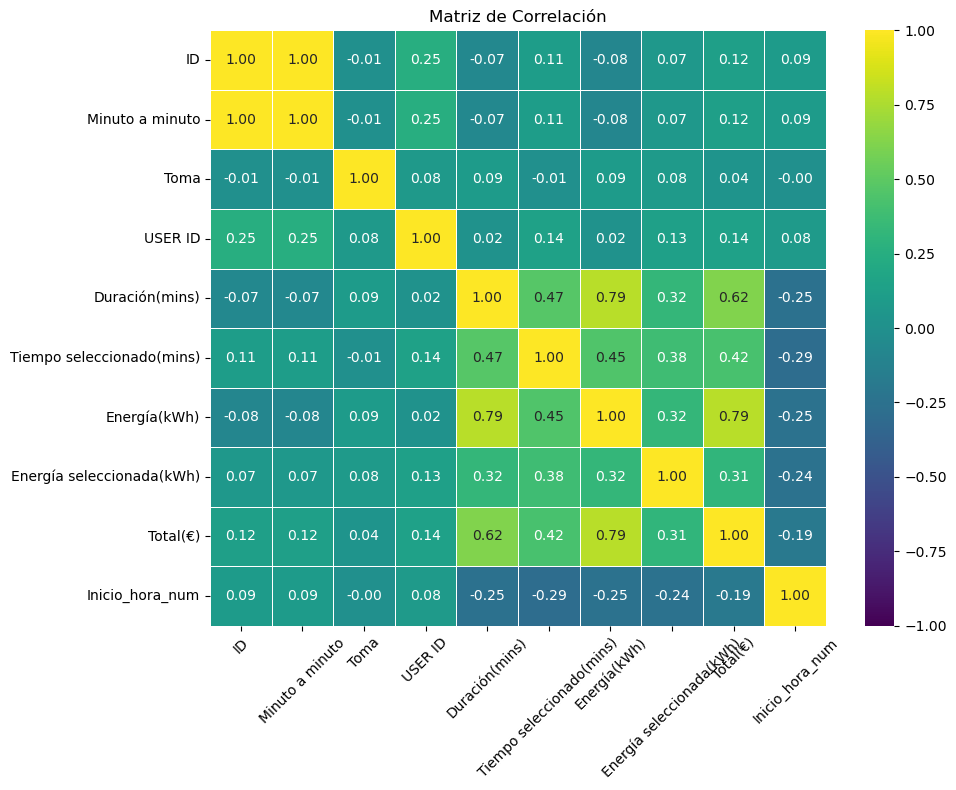

In [ ]:
corr_matrix = sesiones.corr(numeric_only=True, method='kendall')

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el heatmap con colores
sns.heatmap(
    corr_matrix,
    annot=True,       # Muestra los valores numéricos
    cmap='viridis',  
    fmt=".2f",        # Formato de 2 decimales
    linewidths=0.5,   # Ancho de línea entre celdas
    vmin=-1,          # Valor mínimo de correlación (-1)
    vmax=1            # Valor máximo de correlación (1)
)

# Añadir título
plt.title("Matriz de Correlación")

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el diseño para evitar cortes
plt.show()

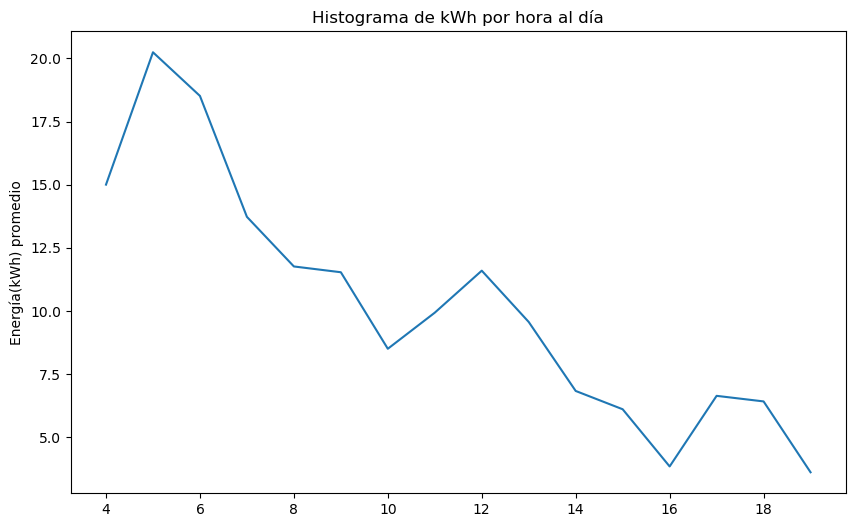

In [438]:
sesiones_por_día = sesiones.groupby(sesiones['Inicio'].dt.hour)['Energía(kWh)'].mean()

# Agrupar por hora usando una función lambda para extraer la hora
#sesiones_por_día = sesiones.groupby(sesiones['Hora media'].apply(lambda x: x.hour))['Energía(kWh)'].mean()

# Histograma de kwh por hora al día
plt.figure(figsize=(10, 6))
plt.plot(sesiones_por_día.index, sesiones_por_día.values)
plt.ylabel('Energía(kWh) promedio')
plt.title('Histograma de kWh por hora al día')
plt.show()

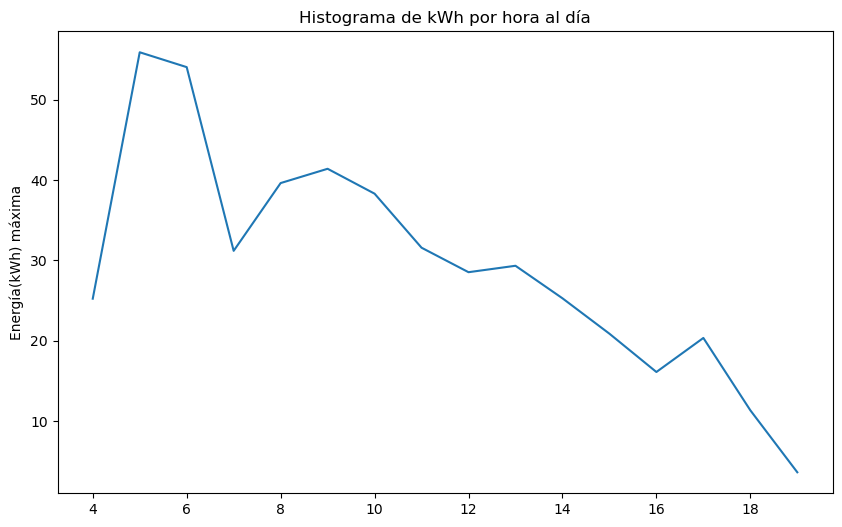

In [258]:
sesiones_por_día = sesiones.groupby(sesiones['Inicio'].dt.hour)['Energía(kWh)'].max()

# Agrupar por hora usando una función lambda para extraer la hora
#sesiones_por_día = sesiones.groupby(sesiones['Hora media'].apply(lambda x: x.hour))['Energía(kWh)'].mean()

# Histograma de kwh por hora al día
plt.figure(figsize=(10, 6))
plt.plot(sesiones_por_día.index, sesiones_por_día.values)
plt.ylabel('Energía(kWh) máxima')
plt.title('Histograma de kWh por hora al día')
plt.show()

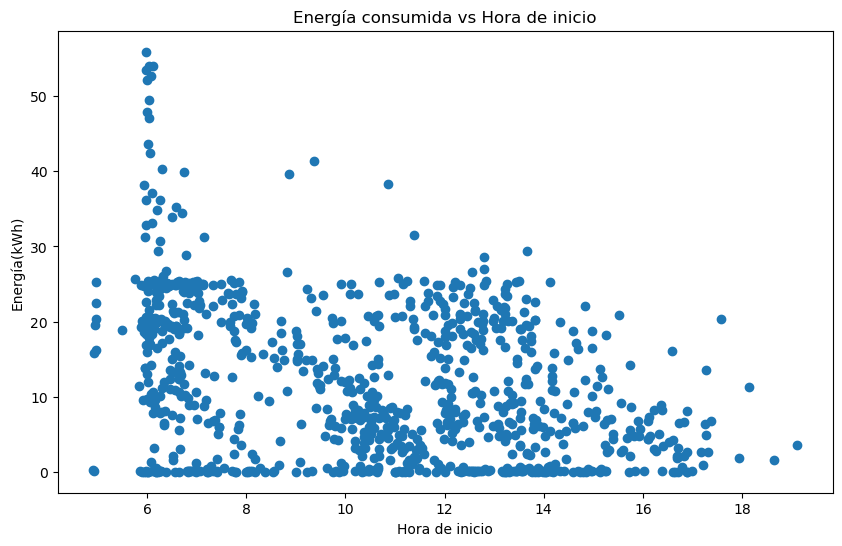

In [259]:
plt.figure(figsize=(10, 6))
plt.scatter(sesiones['Inicio_hora_num'], sesiones['Energía(kWh)'])
plt.xlabel('Hora de inicio')
plt.ylabel('Energía(kWh)')
plt.title('Energía consumida vs Hora de inicio')
plt.show()

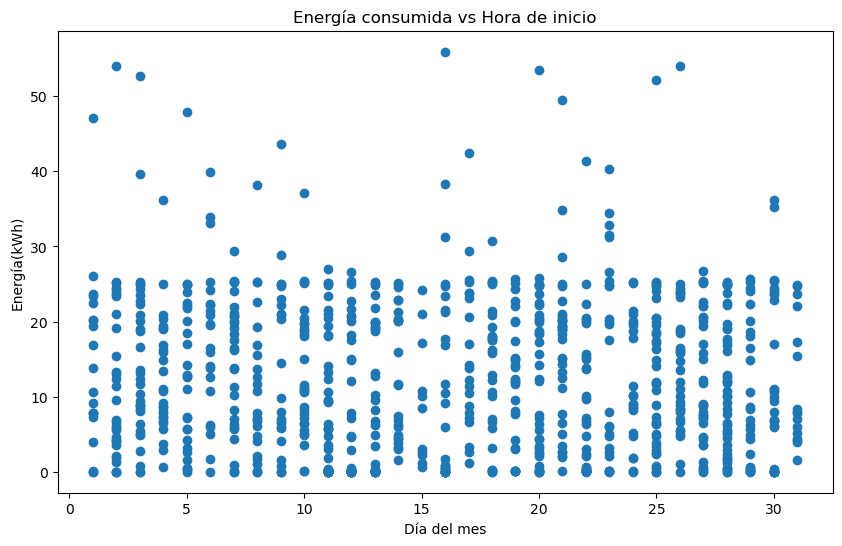

In [450]:
plt.figure(figsize=(10, 6))
plt.scatter(sesiones['Inicio'].dt.day, sesiones['Energía(kWh)'])
plt.xlabel('Día del mes')
plt.ylabel('Energía(kWh)')
plt.title('Energía consumida vs Hora de inicio')
plt.show()

## Regresión Lineal

Esta regresión permite predecir la demanda de energía por horas al día. 

In [ ]:
X = sesiones['Inicio_hora_num']
y = sesiones['Energía(kWh)']

X_p = pd.DataFrame({'intercept': np.ones(len(X)),
                  'X': X,
                  'X2': X**2,
                 'X3': X**3,
                 'X4': X**4,
                 'X5': X**5,
                 'X6': X**6,
                 'X7': X**7,
                 }
                 )

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_p, y, test_size=0.3, random_state=0)



In [287]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Energía(kWh)   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     17.13
Date:                Tue, 20 May 2025   Prob (F-statistic):           7.70e-21
Time:                        17:55:27   Log-Likelihood:                -2382.8
No. Observations:                 651   AIC:                             4782.
Df Residuals:                     643   BIC:                             4817.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1232.8448    907.492     -1.359      0.175   -3014.851     549.161
X            780.6858    643.208      1.214      0.225    -482.356    2043.728
X2          -195.6123    189.373     -1.033      0.302    -567.477     176.252
X3            25.4735     30.034      0.848      0.397     -33.503      84.450
X4            -1.8622      2.774     -0.671      0.502      -7.310       3.586
X5             0.0760      0.149      0.509      0.611      -0.217       0.370
X6            -0.0016      0.004     -0.364      0.716      -0.010       0.007
X7          1.262e-05   5.31e-05      0.238      0.812   -9.16e-05       0.000
==============================================================================
Omnibus:                       29.408   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.097
Skew:                           0.491   Prob(JB):                     6.50e-08
Kurtosis:                       3.508   Cond. No.                     3.59e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

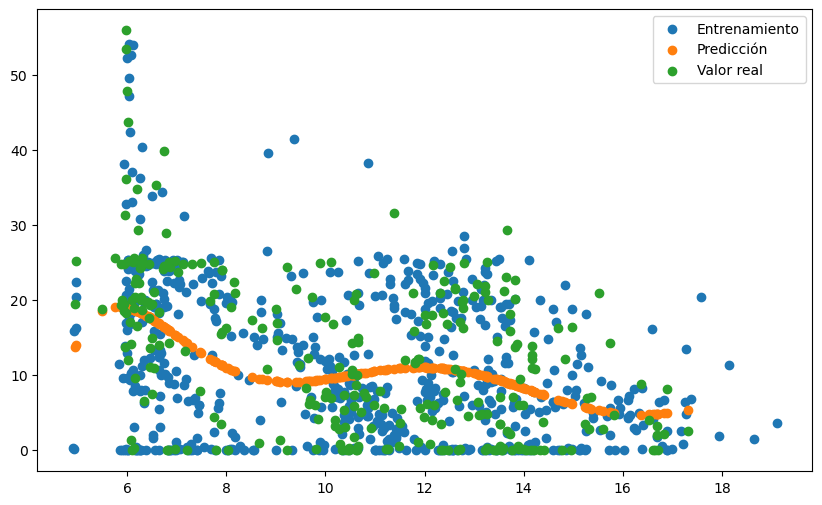

In [288]:
y_pred_test = results.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_train['X'], y_train, label='Entrenamiento')
plt.scatter(X_test['X'], y_pred_test, label='Predicción')
plt.scatter(X_test['X'], y_test, label='Valor real')
plt.legend()
plt.show     

In [289]:
mean_squared_error(y_test, y_pred_test)

82.25563133785855

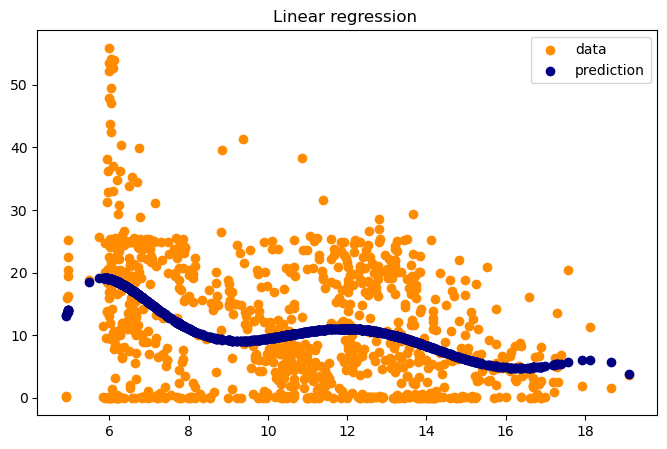

In [290]:
# Grafica los resultados
y_pred = results.predict(X_p)

plt.figure(figsize=(8, 5))
plt.scatter(X_p.X, y, color='darkorange', label='data')
plt.scatter(X_p.X, y_pred, color='navy', label='prediction')
plt.legend()
plt.title('Linear regression ')
plt.show()

## Red neuronal 

In [396]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [306]:
tf.random.set_seed(7)

In [405]:
X = sesiones['Inicio_hora_num'].astype('float32').values.reshape(-1, 1)
y = sesiones['Energía(kWh)']

In [407]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaler = scaler.fit_transform(X)
y_scaler = scaler.fit_transform(y.values.reshape(-1, 1))

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y_scaler, test_size=0.3, random_state=0)

In [439]:
# Reshape the input data to 3D for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [440]:
X_train.shape, y_train.shape

((651, 1, 1), (651, 1))

In [451]:
# Definir modelo
model = Sequential([
    Dense(32, activation='relu', input_shape=(1,)),  # 1 input: hora
    Dense(1)
])

c:\Users\karen\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [442]:
# Compilar modelo
model.compile(optimizer='adam', loss='mse')

In [443]:
# Entrenar modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

In [444]:
# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0315 
Test loss: 0.028098076581954956


In [445]:
y_pred = model.predict(X_test)
#y_pred_inv = scaler.inverse_transform(y_pred)
#y_test_inv = scaler.inverse_transform(y_test)


#x_train_inv = scaler.inverse_transform(X_train.reshape(X_train.shape[0], X_train.shape[2]))
y_train_inv = scaler.inverse_transform(y_train)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [448]:
mean_squared_error(y_test, y_pred)


0.02809807673205235

<function matplotlib.pyplot.show(close=None, block=None)>

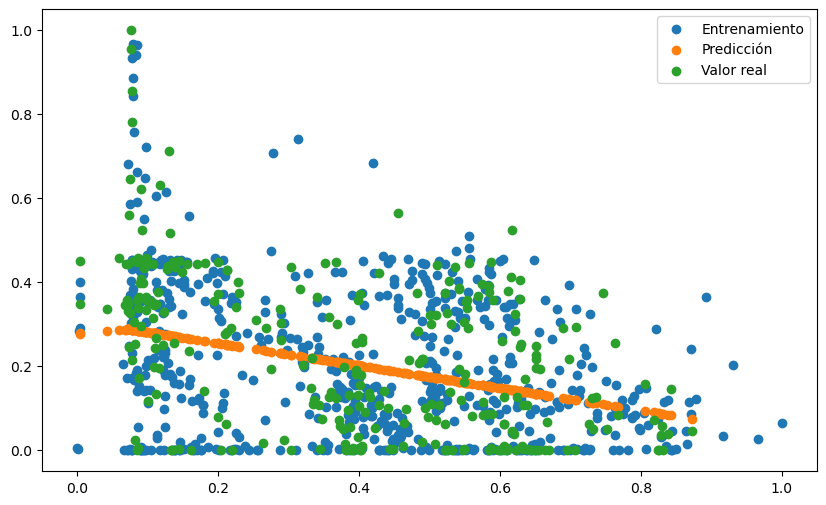

In [449]:
# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Entrenamiento')
plt.scatter(X_test, y_pred, label='Predicción')
plt.scatter(X_test, y_test, label='Valor real')
plt.legend()
plt.show  